# IBM Data Science Professional Certificate – Applied Capstone Project

## Depicting Country-wise population distribution over recommended venues near London

### Roudrav Chakraborty

#### 28th July, 2020

#### **Table of contents :**
- [Introduction](#Introduction)
- [Data Acquisition and Cleaning](#Data-Acquisition-and-Cleaning)
- [Methodology](#Methodology)
- [Results](#Results)
- [Discussion](#Discussion)
- [Conclusion](#Conclusion)

<a id="Introduction"></a>
## **1. Introduction**

### **1.1 Background**
#### London, the capital of England and the biggest city in the entire United Kingdom is probably one of the most famous cities in the world. Also known as “The Swinging City” and “Home of The Big Ben”, it surely is a collection of magnificent places. From ‘Buckingham Palace’ and ‘The Big Ben’ to ‘Westminster Abbey’ and ‘The London Eye’, the city is a galore of attraction points.
#### That being said, there are always recommended spots in a city that attract people of all tastes and get tagged as ‘Must Go-to’ areas. People from all corner of the city tend to check them out and get to explore the various aspects of these venues. The city being host to a diverse collection of people from different nationalities, enables people from all around the globe to experience the areas.
#### It would be interesting to see how country-wise trend (outside United Kingdom) in people going to a particular recommended place has changed over a particular span of time. This data if made available to those places in a visual manner, might allow the respective venues to improve on their qualities by seeing the trend for different countries. This can lead to higher revenues and might allow the businesses to flourish.

### **1.2 Problem**
#### The count of the people in the city segregated country-wise and coupled with the likes for a recommended place can give a fairly good idea (by assumption of a scale) about the distribution of the population over those venues. Hence this project aims to depict the country-wise distribution of the population over a recommended area and visualize the change (in trend of people from different nationalities visiting) over a period of time, which when used would ensure that opportunities for improvement or new ideas come up for those places.

### **1.3 Interest**
#### The visualized data, when made public, would be useful to the recommended places as they can analyze the factors behind their success. It would also be helpful for currently under-performing areas to get delve deeper and find out as to what elements impact a nationality’s preference of a place.

<a id="Data-Acquisition-and-Cleaning"></a>
## **2. Data Acquisition and Cleaning**

### **2.1 Data sources**
#### The data was obtained from the [London Datastore](https://data.london.gov.uk/dataset/nationality) which contained the **[Detailed Nationality](https://data.london.gov.uk/download/nationality/5bd4e27c-3d20-4832-885a-b98312348ad9/nationality-detailed-london.xls)** dataset showing the nationality estimates for specific countries outside United Kingdom such as India, United States, Australia, Canada, etc. available for London as a whole. The data set contains the population residing in London per country across 12 years. However, we will be working with the following 5 nationalities for a period of 2008-2018 i.e., 10 years :

- India

- France

- United States

- Portugal

- Australia

#### Apart from this, we would be leveraging the [Foursquare API](https://developer.foursquare.com/) endpoints to obtain the Recommended places in London at the time of execution. This data would be coupled with the Likes per venue to give a brief idea as to how many people would be visiting a recommended place. Upon cross-referencing them with the population dataset, we would depict a pattern of nationalities towards those places.

### **2.2 Data cleaning**
#### The population data was extracted into pandas dataframe **nat_df**. Firstly, the dataset had multiple columns merged into a single cell, hence they were not labelled properly. The year columns were the only headers that were correctly marked.
#### Hence, I first generated a list containing the first column (which was the country name) and the 10 consecutive years vis-à-vis 2008 to 2018. From the entire dataset, I extracted the data for only these 11 columns.
#### Next, due to blank cells at the top of the sheet and the bottom of the sheet, a lot of NaN values were present. So the first 2 records and the last 3 records were dropped from the dataframe to ensure that only the respective county names are present along with the years. Then, I set the ‘Country’ column as the index of the dataframe so that it becomes easier to slice and data retrieval is simplified.
#### [Here](#nat_df) is how the cleaned nationality dataframe looked like.

#### Next, I needed the recommended venues within a specific range of the city of London. I defined a custom radius of 50000 meters (50 Kilometers) for extracting the data and fetched up to a limit of 100 venues. The response of the **Foursquare Explore** endpoint was JSON collection which required to be wrangled in order to extract meaningful information. It was the same case for **Foursquare Likes** endpoint, which returned the data in a JSON format.
#### In both cases, the lists and dictionaries in the JSONs were indexed and the required information was extracted. The dataframe **venues_df** for Venues was created first and then a list containing the Like counts was appended to the dataframe as a column. The dataframe was then sorted in descending order on the basis of the Like count and the top 13 rows (corresponding to the top 13 recommended places) were stored.
#### [Here](#venues_df) is how the cleaned venue dataframe looked like.

### **2.3 Feature selection**
#### For the Nationality dataframe, the data was selected for the following countries :

- India

- France

- United States

- Canada

- Australia

#### The year range was selected as 2008 – 2018 to allow proper non-cluttered visualization. For the Venues dataframe, unnecessary columns such as address, referrals etc. were excluded and only the relevant fields such as Venue ID, Venue Name, Coordinates (Latitude and Longitude) and Category were kept. A list of Likes per venue was added as a column in the Venue dataframe.

In [1]:
# Installing and Importing Libraries
import pandas as pd
import numpy as np
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
!conda install -c conda-forge folium=0.5.0 --yes
import folium
!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim
%matplotlib inline
print('Libraries imported !')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported !


In [2]:
# Importing the dataset into Pandas dataframe
file_url = 'https://data.london.gov.uk/download/nationality/5bd4e27c-3d20-4832-885a-b98312348ad9/nationality-detailed-london.xls'
nat_df = pd.read_excel(file_url,sheet_name = 'Nationality')
print('Dataset data stored in Dataframe !')

Dataset data stored in Dataframe !


In [3]:
# Generating Header List to extract required columns
hdr_list = ['Unnamed: 0'] # Contains the country name, will be renamed later

# Loop to generate the Header List containing years
for i in range(2009,2019):
    hdr_list.append(i)

# Extracting only the required columns from the dataframe
nat_df = nat_df[hdr_list]

# Updating the Header list with the new column name as Country
hdr_list[0] = 'Country'
print('Header List : ', hdr_list)

Header List :  ['Country', 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [4]:
#Removing the first 2 and last 3 rows as they only contains NaN values which are unnecessary
nat_df = nat_df.drop([0,1])
nat_df = nat_df.drop([44,45,46])

# Converting numbers in the header list to string for uniformity of datatype
hdr_list = list(map(str,hdr_list))
print('Updated Header List : ', hdr_list)

# Renaming the original columns with the created Header list
nat_df.columns = hdr_list

# Setting Country as the index of the dataframe
nat_df.set_index('Country',inplace=True)

# Defining countries for which the analysis will be done and considering the total population as well
country_list = ['India','France','United States','Portugal','Australia','Total']
nat_df = nat_df.loc[country_list]

# Renaming index 'Total' as 'Total Population of London'
nat_df.rename(index={'Total': 'Total Population of London'}, inplace=True)

Updated Header List :  ['Country', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018']


<a id="nat_df"></a>
#### Printing the Nationality dataframe :

In [5]:
nat_df

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,
India,99000,127000,128000,156000,131000,126000,119000,112000,115000,139000
France,68000,57000,81000,68000,79000,91000,88000,100000,92000,84000
United States,43000,42000,46000,53000,49000,50000,56000,48000,51000,56000
Portugal,54000,42000,53000,56000,64000,73000,86000,86000,93000,76000
Australia,41000,35000,38000,37000,38000,48000,37000,43000,40000,39000
Total Population of London,7870000,7985000,8130000,8236000,8341000,8465000,8591000,8698000,8750000,8888000


#### Now, we define out Foursquare credentials (which will be masked with XXXXXXXXX while sharing the notebook) to obtain data using Foursquare API endpoints.

In [6]:
# Defining Foursquare credentials (to be masked while sharing notebook)
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
OAUTH = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

# Version for API call
VERSION = '20200731'

# Number of entries to be returned by the API
LIMIT = 100

# Radius in metres within which the areas will be returned
RADIUS = 50000

In [7]:
# Defining City of refence for obtaining Latitute and Longitude Values
city = 'London'
geolocator = Nominatim(user_agent="foursquare_agent")
location = geolocator.geocode(city)
latitude = location.latitude
longitude = location.longitude

In [8]:
# Using Foursquare Explore Endpoint to obtain the JSON collection of recommended places 
venue_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, RADIUS, LIMIT)

# Extracting the JSON collection of venues returned by the API
venues = requests.get(venue_url).json()

# Fetching the relevant values from the JSON data
venues = venues['response']['groups'][0]['items']

# Normalizing the JSON data into a dataframe
venues_df = pd.json_normalize(venues)

# Defining and selecting the columns that will be used in the dataframe
columns = ['venue.id','venue.name','venue.location.lat','venue.location.lng','venue.categories']
venues_df = venues_df[columns]

# Defining new column list and updating in dataframe
new_columns = ['Venue_ID','Venue_Name','Latitude','Longitude','Category']
venues_df.columns = new_columns

# Obtain the actual category for each venue and updating it in the Category column (which was earlier in JSON format)
cat_list = []
for i in range(0,venues_df.shape[0]):
    str = venues_df.loc[i,'Category']
    cat_list.append(str[0]['name'])
venues_df['Category'] = cat_list

In [9]:
# Fetching the count of likes for each individual venue and generating a list to be added to the dataframe by passing the Venue ID in the Foursquare Likes Endpoint
likes = []
likes_list = []
for j in range(0,venues_df.shape[0]):
    venue_id = venues_df.loc[j,'Venue_ID']
    likes_url = 'https://api.foursquare.com/v2/venues/'+venue_id+'/likes?client_id={}&client_secret={}&v={}'.format(CLIENT_ID, CLIENT_SECRET,VERSION)
    likes.append(requests.get(likes_url).json())
    likes_val = likes[j]['response']['likes']['count']
    likes_list.append(likes_val)

In [10]:
# Appending the generated list of Likes to the Venue dataframe
venues_df['Likes'] = likes_list

# Now we sort the Venue dataframe by count of Likes in descending order
venues_df.sort_values('Likes', axis = 0, ascending = False, inplace = True)
venues_df.reset_index(drop=True, inplace=True)

In [11]:
# We pick the top 13 places to analyze based on the users' like count
venues_df = venues_df.head(13)

In [12]:
# Renaming a particular cell for ease of reading
venues_df.loc[venues_df['Venue_ID'] == '4ac518cef964a520f6a520e3', 'Venue_Name'] = 'Big Ben'

<a id="venues_df"></a>
#### Printing the Venues dataframe :

In [13]:
venues_df

,Venue_ID,Venue_Name,Latitude,Longitude,Category,Likes
0,4ac518d2f964a52026a720e3,Hyde Park,51.507781,-0.162392,Park,11636
1,4ae5b238f964a52087a121e3,Selfridges & Co,51.514640,-0.152864,Department Store,9163
2,4ac518d2f964a5203da720e3,British Museum,51.519009,-0.126437,History Museum,8539
3,4ac518eff964a52064ad20e3,Borough Market,51.505495,-0.090518,Farmers Market,7590
4,4ac518cef964a520f6a520e3,Big Ben,51.500620,-0.124578,Monument / Landmark,6467
5,4ac518cef964a520f7a520e3,Tower of London,51.508248,-0.076261,Castle,4876
6,4ac518cdf964a520e6a520e3,National Gallery,51.508876,-0.128478,Art Museum,4689
7,4ac518cef964a520f9a520e3,Trafalgar Square,51.507987,-0.128048,Plaza,4531
8,4ba6419bf964a520b23f39e3,Covent Garden Market,51.511977,-0.122799,Shopping Plaza,3556
9,4b233922f964a520785424e3,Regent's Park,51.530479,-0.153766,Park,3446


<a id="Methodology"></a>
## **3. Methodology**

#### We start by depicting the growth of the population per country over the selected period of years. This will give us an idea of the chances of people from a given nationality to a particular recommended place. We transpose the original nationality dataframe **nat_df** to obtain the year values as a column.

In [14]:
# Transposing the Nationality dataframe to obtain the year values as a column
nat_df_tran = nat_df.T
nat_df_tran.reset_index(inplace=True)

In [15]:
# Renaming columns for ease of use
nat_df_tran.columns = ['Year', 'India', 'France', 'US', 'Portugal', 'Australia', 'Total Population of London']
nat_df_tran

,Year,India,France,US,Portugal,Australia,Total Population of London
0,2009,99000,68000,43000,54000,41000,7870000
1,2010,127000,57000,42000,42000,35000,7985000
2,2011,128000,81000,46000,53000,38000,8130000
3,2012,156000,68000,53000,56000,37000,8236000
4,2013,131000,79000,49000,64000,38000,8341000
5,2014,126000,91000,50000,73000,48000,8465000
6,2015,119000,88000,56000,86000,37000,8591000
7,2016,112000,100000,48000,86000,43000,8698000
8,2017,115000,92000,51000,93000,40000,8750000
9,2018,139000,84000,56000,76000,39000,8888000


#### Then we create a subplot grid of size 3x3 and plot the data of 5 countries in that. The figure observed is shown below.

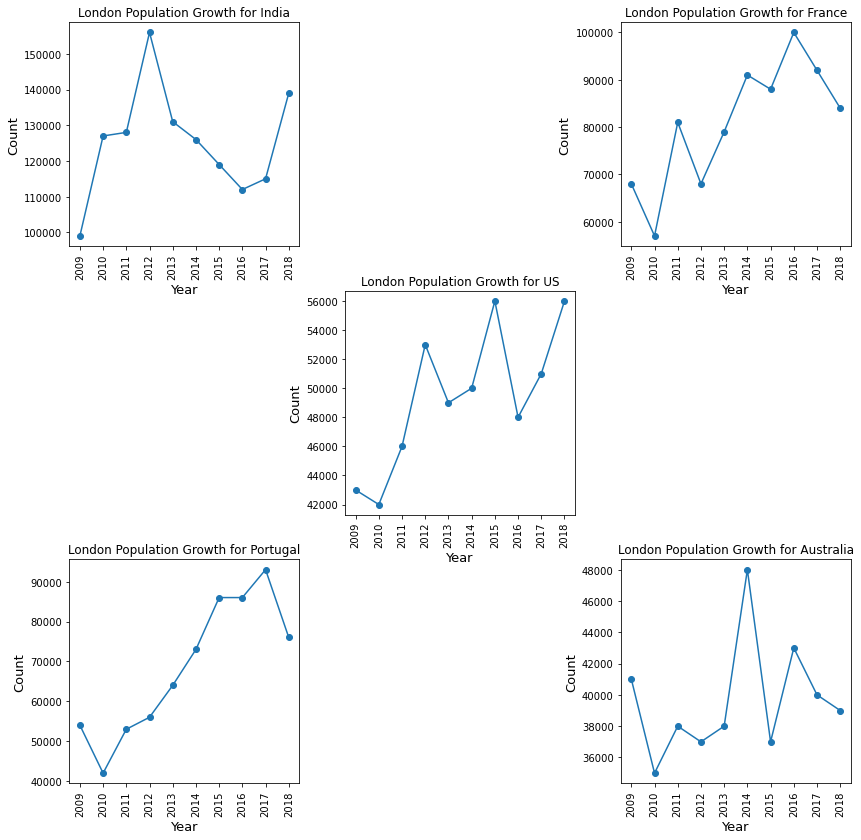

In [16]:
# Creating 5 scatter plots on a 3x3 grid to depict the population groowth in the city
fig = plt.figure(figsize=(14,14))
ax1 = fig.add_subplot(3, 3, 1)
ax2 = fig.add_subplot(3, 3, 3)
ax3 = fig.add_subplot(3, 3, 5)
ax4 = fig.add_subplot(3, 3, 7)
ax5 = fig.add_subplot(3, 3, 9)

# Axes list to be used inside the loop
ax_list = [0,ax1,ax2,ax3,ax4,ax5]

ax = plt.gca()
for i,col in zip(range(0,len(ax_list)),nat_df_tran.columns):
    if col == 'Year' or col == 'Total Population of London':
        continue
    val = nat_df_tran[col]
    ax_list[i].scatter(nat_df_tran.Year,val)
    ax_list[i].plot(nat_df_tran.Year,val)
    ax_list[i].title.set_text('London Population Growth for '+col)
    ax_list[i].set_xlabel('Year')
    ax_list[i].set_ylabel('Count')
    ax_list[i].ticklabel_format(style='plain',axis='y')
    ax_list[i].xaxis.label.set_size(13)
    ax_list[i].yaxis.label.set_size(13)
    ax_list[i].tick_params(axis='x', rotation=90)
    plt.xlabel('Year')
    plt.ylabel('Count')
plt.show()

#### Now, we plot the venues over the map of London to get a brief idea of the vicinity of each place and whether they can impact each other’s business. The map is plotted using the Folium library and circle markers with popup are placed to show the location of each venue.
#### [Here](#folium_map) is the map after it is generated.

In [17]:
# Define the map centered around London
london_map = folium.Map(location=[latitude, longitude], zoom_start=13)

# Instantiate a feature group for the venues in the dataframe
recomm_map = folium.map.FeatureGroup()

# loop through the venue coordinates for plotting the map
for lat, long, in zip(venues_df.Latitude, venues_df.Longitude):
    recomm_map.add_child(
        folium.features.CircleMarker(
            [lat, long],
            radius=5,
            color='black',
            fill=True,
            fill_color='yellow',
            fill_opacity=0.6))

# Place marker on top of the venues circles
for lat,lan,label in zip(venues_df.Latitude, venues_df.Longitude, venues_df.Venue_Name): 
    folium.Marker(location=[lat,lan],popup = folium.Popup(label, parse_html=True)).add_to(london_map)

<a id="folium_map"></a>
#### Printing the map of London with the recommended venues and markers :

In [18]:
# Add feature to map and display it
london_map.add_child(recomm_map)

#### Next, we set the Year back as index and then calculate the percentage of different nationalities with respect to the population of London. This population when multiplied with the scaled Like count can be a metric to estimate the trend of different nationalities at a given place.

In [19]:
# Setting index Year on dataframe
nat_df_tran.set_index('Year',inplace=True)

# Converting to percentage based on population count
nat_df_tran_per = nat_df_tran.div(nat_df_tran['Total Population of London'],axis = 0)

# Reset the index to bring back the year column
nat_df_tran_per.reset_index('Year',inplace=True)

#### The percentage dataframe **nat_df_tran_per** looks like as follows :

In [20]:
# Displaying the percentage dataframe
nat_df_tran_per

,Year,India,France,US,Portugal,Australia,Total Population of London
0,2009,0.0125794,0.00864041,0.00546379,0.0068615,0.00520966,1
1,2010,0.0159048,0.00713838,0.00525986,0.00525986,0.00438322,1
2,2011,0.0157442,0.0099631,0.00565806,0.00651907,0.00467405,1
3,2012,0.0189412,0.00825644,0.00643516,0.00679942,0.00449247,1
4,2013,0.0157056,0.00947129,0.0058746,0.00767294,0.00455581,1
5,2014,0.0148848,0.0107501,0.00590667,0.00862374,0.00567041,1
6,2015,0.0138517,0.0102433,0.00651845,0.0100105,0.00430683,1
7,2016,0.0128765,0.0114969,0.00551851,0.00988733,0.00494367,1
8,2017,0.0131429,0.0105143,0.00582857,0.0106286,0.00457143,1
9,2018,0.0156391,0.00945095,0.00630063,0.00855086,0.00438794,1


#### Now, we make an important assumption. We scale the venue likes according to the average population of the city over the last 10 years. We have **assumed** that the number of likes given per venue has been from a sample of 50000 users. So, if a venue has 5000 likes, then according to our assumption among 50000 users who visited the place, 5000 explicitly posted a like for it, which was eventually captured in the Foursquare database.

#### Based on this assumption, we scale the Likes column of the **venues_df** dataframe by multiplying the Like count per place with the mean population of London over the last 10 years and then dividing it by out sample size i.e., 50000. It is then rounded off to the nearest lower whole number.

In [21]:
# Scaling as per the assumption above
london_mean_popn = nat_df_tran['Total Population of London'].mean()
venues_df['Likes'] = ((venues_df['Likes']*london_mean_popn)/50000).apply(np.floor)

#### The new **venues_df** dataframe with the updated like count looks as follows :

In [22]:
venues_df

,Venue_ID,Venue_Name,Latitude,Longitude,Category,Likes
0,4ac518d2f964a52026a720e3,Hyde Park,51.507781,-0.162392,Park,1953777.0
1,4ae5b238f964a52087a121e3,Selfridges & Co,51.514640,-0.152864,Department Store,1538541.0
2,4ac518d2f964a5203da720e3,British Museum,51.519009,-0.126437,History Museum,1433766.0
3,4ac518eff964a52064ad20e3,Borough Market,51.505495,-0.090518,Farmers Market,1274421.0
4,4ac518cef964a520f6a520e3,Big Ben,51.500620,-0.124578,Monument / Landmark,1085861.0
5,4ac518cef964a520f7a520e3,Tower of London,51.508248,-0.076261,Castle,818719.0
6,4ac518cdf964a520e6a520e3,National Gallery,51.508876,-0.128478,Art Museum,787320.0
7,4ac518cef964a520f9a520e3,Trafalgar Square,51.507987,-0.128048,Plaza,760791.0
8,4ba6419bf964a520b23f39e3,Covent Garden Market,51.511977,-0.122799,Shopping Plaza,597080.0
9,4b233922f964a520785424e3,Regent's Park,51.530479,-0.153766,Park,578610.0


#### Next, we plot a collection of 13 scatter plots (corresponding to 13 different places) on a 5x5 subplot grid to depict the trend of different nationalities in one single go. Each scatter plot contains the data for all the 5 selected countries over a period of 10 years. The Matplotlib library has been used to generate the subplots and the Pyplot layer along with Axes method has been used to generate the scatter plots.

#### To prevent excessive lengthy code, we have generated an Axes list which store the subplot information. This Axes list is referred inside two for loops where the Like count for each individual venue is multiplied by the population percentage (as obtained above) to get the rough count of a nationality’s presence at a particular place. 

#### The final scatter plot collection looks as follows :

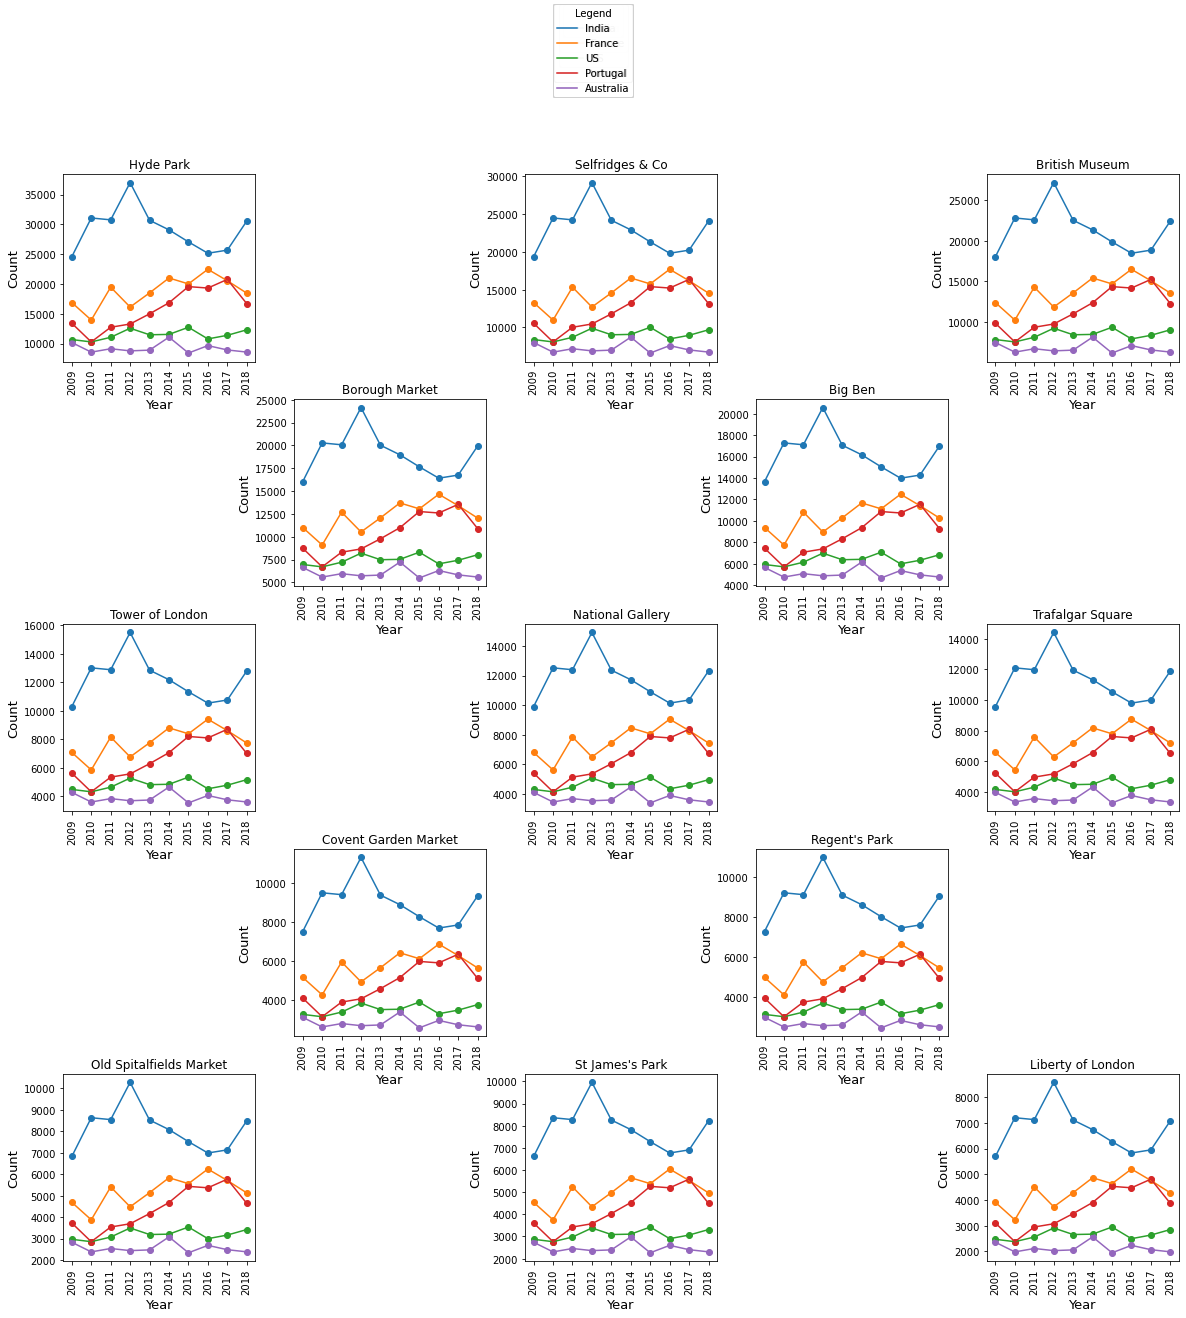

In [23]:
# Generate scatter plot collection that displays the trend of multiple countries across 10 years for each recommended place
fig = plt.figure(figsize=(20,20))
i = 0
ax_list = []
while (i<13):
    ax_list.append(fig.add_subplot(5, 5, (i*2)+1))      # Axes list which will be referred later
    i = i+1
for i in range(0,len(ax_list)):
    for col in nat_df_tran_per.columns:
        if col == 'Year' or col == 'Total Population of London':
            continue
        val = venues_df.loc[i,'Likes']*nat_df_tran_per[col].to_frame()
        ax_list[i].scatter(nat_df_tran_per.Year,val)
        ax_list[i].plot(nat_df_tran_per.Year,val,label=col)
        ax_list[i].title.set_text(venues_df.loc[i,'Venue_Name'])
        ax_list[i].set_xlabel('Year')
        ax_list[i].set_ylabel('Count')
        ax_list[i].ticklabel_format(style='plain',axis='y')
        ax_list[i].xaxis.label.set_size(13)
        ax_list[i].yaxis.label.set_size(13)
        ax_list[i].tick_params(axis='x', rotation=90)
        plt.xlabel('Year')
        plt.ylabel('Count')
        handles, labels = ax_list[i].get_legend_handles_labels()
        fig.legend(handles, labels, loc='upper center', title = 'Legend')
plt.show()

<a id="Results"></a>
## **4. Results**

#### After conducting the study and checking variety of details, the following are the results :
- People tend to focus more on historical areas, department stores, shopping areas and markets rather than restaurants, performing art venues and bookstores.

- Indians and Americans have shown considerable interest in checking out the recommended areas, which can come from the fact that their population has seen a significant rise over the past few years.

- Since restaurants, concert halls and coffee shops are not at the top of the recommendation list, these businesses need to revisit their plans to come up with more attractive offers for better sustainability.

- World famous places such as Big Ben, National Gallery, British Museum etc. have not been the most recommended places. Therefore, we can safely assume that all places need to upgrade themselves with time to stay within recommendations

<a id="Discussion"></a>
## **5. Discussion**
### Based on the data and the charts plotted accordingly, we can infer the following :
- Hyde park is one of the most recommended areas in the city. A further internet search portrays that it is the largest of four Royal Parks, which explains its popularity among people from all countries.

- Department Stores and Parks are the major categories under which most of the recommended places fall.

- Most of the recommended places are centered around the river Thames, which means that for a potential new businessperson, the area around River Thames could be a major spot.

- In general, most of the recommended places are situated at a relatively similar distance from each other, which means that business interference between two recommended places is minimal. This also comes from the fact that there are variety of categories present for the recommended places.

- 3 out of 5 countries under study have shown a decline in the population in London. This can be due to many reasons, but it cannot be ruled out that the city’s recommended places are not attracting them anymore.


<a id="Conclusion"></a>
## **6. Conclusion**
### As a part of this project and study, we demonstrated that with the right dataset and the right skills, plausible relationships can be established between features which can lead to deeper insights. We studied the trend of population changes for people of 5 nationalities over a period of 10 years for recommended places in London area.

### These studies can be vital for businesses to identify loopholes or diminishing traits due to which they are not able to hold on to their customer/tourist base of various cultural and national diversities. On the other hand, it also allows the flourishing businesses to analyze their success factors and improve them further for a better experience.

### This concludes the report for this Capstone project. Thank you.